In [21]:
# ייבוא ספריות והגדרות מסודרות לעבודה שלי של חן ורעות
# לא לגעת בזה 
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats  # למבחנים סטטיסטיים שונים (t-test, חי בריבוע, ANOVA ועוד)
import statsmodels.api as sm  # לרגרסיה לוגיסטית ומבחנים נוספים
import statsmodels.formula.api as smf  # לרגרסיה מבוססת נוסחאות





"""
 כללי עבודה:
1. כל פקודה תעובד בנפרד בשלב הראשון, כך נוכל לבדוק אם יש שגיאות בודדות ולטפל בהן.
2. בסוף, אחרי שכל הפקודות נבדקו והן פועלות בצורה תקינה, נריץ את כל הפקודות יחד.
# זה חשוב לוודא שהקוד עובד כמו שצריך ולמנוע בעיות לא צפויות בריצה הגדולה
"""

"""
מה הספקנו עד עכשיו:
1. הגדרת נתיב לשאיבת הנתונים של הקובץ המקורי
2. ניקוי כל השורות האחרונות והמיותרות
3. בדיקה של ערכים חסרים בכל עמודה
"""

"""
תכונות מעניינות שלמדנו:
1. במידה ושמים נקודה פסיק  בסוף פקודה היא לא תרוץ
2. קיצור להרצת הקוד - שיפט ואנטר ביחד
3. קיצור לצפייה בהוראות הפקודה - שיפט וטאב ביחד
"""

# קביעת הנתיב של תיקיית העבודה הנוכחית
project_root = os.getcwd()
input_file = os.path.join(project_root,"Update 1 - Gender","df_with_readmission_flags.xlsx")

C:\Users\hadma\AppData\Local\Temp\ipykernel_21100\1109272787.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_comparison['Number of Patients'], y=df_comparison['Readmission Status'], palette='coolwarm')


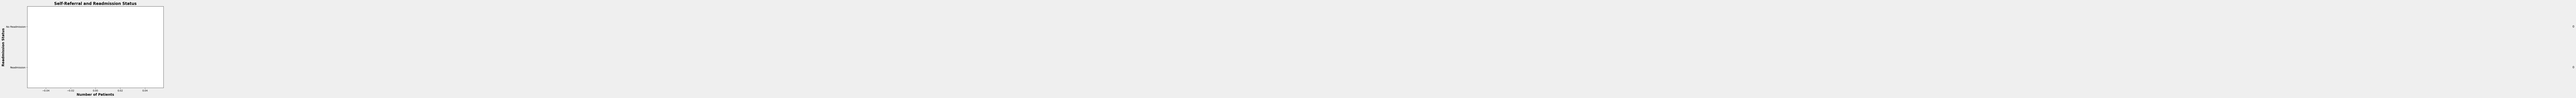

'C:\\Users\\hadma\\Desktop\\git\\DataFinalProjectDegree\\final_project\\Statistical tests_Updates\\Self_Referral_Comparison\\self_referral_comparison.png'

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# קריאה לקובץ החדש
df_new_with_readmission = pd.read_excel(input_file)

# הסרת כפילויות של מספר מטופל רנדומלי כך שכל מטופל יופיע רק פעם אחת
df_unique = df_new_with_readmission.drop_duplicates(subset=['מספר מטופל רנדומלי'])

# חישוב כמות המטופלים שפנו בפנייה עצמית ואשפוז חוזר
self_referred_no_readmission = df_unique[(df_unique['קטגוריית גורם מפנה_פניה עצמית'] == 1) & (df_unique['מספר אשפוז חוזר'] == 1)].shape[0]
self_referred_readmission = df_unique[(df_unique['קטגוריית גורם מפנה_פניה עצמית'] == 1) & (df_unique['מספר אשפוז חוזר'] > 1)].shape[0]

# נתונים להשוואה
data = {
    'No Readmission': self_referred_no_readmission,
    'Readmission': self_referred_readmission
}

# יצירת DataFrame מהנתונים
df_comparison = pd.DataFrame(list(data.items()), columns=["Readmission Status", "Number of Patients"])

# יצירת גרף עמודות אופקיות
plt.figure(figsize=(10, 6))
sns.barplot(x=df_comparison['Number of Patients'], y=df_comparison['Readmission Status'], palette='coolwarm')

# הוספת מספרים מעל העמודות
for index, value in enumerate(df_comparison['Number of Patients']):
    plt.text(value + 2, index, f"{value}", va="center", fontsize=12)

# הוספת כותרות וצירים
plt.title("Self-Referral and Readmission Status", fontsize=16, weight='bold')
plt.xlabel('Number of Patients', fontsize=14, weight='bold')
plt.ylabel('Readmission Status', fontsize=14, weight='bold')

# התאמת צבע הרקע
plt.gcf().set_facecolor('#efefef')

# יצירת תיקייה ושמירת הגרף
output_dir = os.path.join(project_root, "Self_Referral_Comparison")
os.makedirs(output_dir, exist_ok=True)
image_path = os.path.join(output_dir, "self_referral_comparison.png")
plt.savefig(image_path, format='png')

# הצגת הגרף
plt.show()

# הצגת נתיב השמירה
image_path


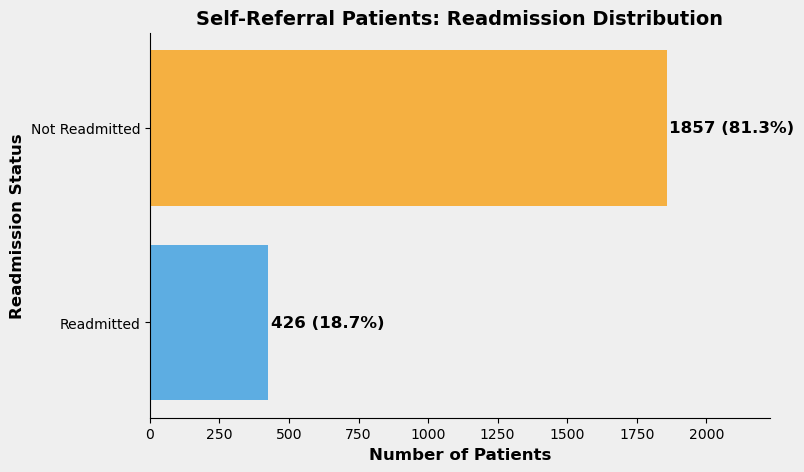

Chi-Square Test p-value: 1.0
Proportion Z-Test p-value: 0.0


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from statsmodels.stats.proportion import proportions_ztest

# Load the dataset
df = pd.read_excel(input_file)

# Filter only self-referred patients (where "קטגוריית גורם מפנה_פניה עצמית" == 1)
self_referred_patients = df[df["קטגוריית גורם מפנה_פניה עצמית"] == 1]

# Drop duplicates based on "מספר מטופל רנדומלי" to ensure unique patients are counted
self_referred_unique_patients = self_referred_patients.drop_duplicates(subset=["מספר מטופל רנדומלי"])

# Count patients who were readmitted (מספר אשפוז חוזר > 0)
num_self_referred_readmitted = self_referred_unique_patients[self_referred_unique_patients["מספר אשפוז חוזר"] > 0]["מספר מטופל רנדומלי"].nunique()

# Count patients who were not readmitted (מספר אשפוז חוזר == 0)
num_self_referred_not_readmitted = self_referred_unique_patients[self_referred_unique_patients["מספר אשפוז חוזר"] == 0]["מספר מטופל רנדומלי"].nunique()

# Prepare data for statistical test
contingency_table = [[num_self_referred_readmitted, num_self_referred_not_readmitted]]

# Perform Chi-Square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Perform Proportion Z-Test
total_patients = num_self_referred_readmitted + num_self_referred_not_readmitted
count = [num_self_referred_readmitted, num_self_referred_not_readmitted]
nobs = [total_patients, total_patients]
stat, p_value_ztest = proportions_ztest(count, nobs)

# Prepare data for plotting
readmission_counts = {
    "Readmitted": num_self_referred_readmitted,
    "Not Readmitted": num_self_referred_not_readmitted
}

# Convert to list for proper plotting
categories = list(readmission_counts.keys())
values = list(readmission_counts.values())

# Recalculate percentages
total_patients = num_self_referred_readmitted + num_self_referred_not_readmitted
percentages = [(value / total_patients) * 100 for value in values]

# Define improved colors for better aesthetics
colors = ["#5DADE2", "#F5B041"]  # Softer blue and warm orange

# Set overall background color
fig, ax = plt.subplots(figsize=(8, 5))
fig.patch.set_facecolor('#efefef')  # Light gray background for presentation

# Create the horizontal bar chart
bars = ax.barh(categories, values, color=colors)

# Ensure labels are positioned next to the bars but stay within the graph area
for bar, count, percent in zip(bars, values, percentages):
    x_position = min(bar.get_width() + 10, max(values) * 1.05)  # Slightly shift further right to prevent overlap
    ax.text(x_position, bar.get_y() + bar.get_height()/2, 
             f"{count} ({percent:.1f}%)", ha='left', va='center', fontsize=12, color='black', fontweight='bold')

# Labels and title with better styling
ax.set_ylabel("Readmission Status", fontsize=12, fontweight='bold')
ax.set_xlabel("Number of Patients", fontsize=12, fontweight='bold')
ax.set_title("Self-Referral Patients: Readmission Distribution", fontsize=14, fontweight='bold')

# Set background of the graph area
ax.set_facecolor('#efefef')  # Light gray

# Adjust x-axis to ensure labels remain fully visible
ax.set_xlim(0, max(values) * 1.2)

# Remove borders for a cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show plot
plt.show()

# Print p-value results
print(f"Chi-Square Test p-value: {p_value}")
print(f"Proportion Z-Test p-value: {p_value_ztest}")


In [29]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

# טעינת הנתונים
df = pd.read_excel(input_file)

# הסרת כפילויות לפי מספר מטופל רנדומלי - שמירת האשפוז האחרון של כל מטופל
df_unique = df.sort_values(by=["מספר מטופל רנדומלי", "תאריך ושעת כניסה למחלקה"], ascending=[True, False])
df_unique = df_unique.drop_duplicates(subset=["מספר מטופל רנדומלי"], keep="first")

# פילוח הנתונים לאחר שמירת האשפוז האחרון בלבד
df_returned = df_unique[df_unique["מספר אשפוז חוזר"] != 0]
df_not_returned = df_unique[df_unique["מספר אשפוז חוזר"] == 0]

# חילוץ ערכי גיל אשפוז לאחר סינון הכפילויות
ages_returned = df_returned["גיל אשפוז"].dropna()
ages_not_returned = df_not_returned["גיל אשפוז"].dropna()

# הצגת מספר הנתונים הזמינים בכל קבוצה
print(f"Available data points:")
print(f"   - Readmitted Patients: {len(ages_returned)}")
print(f"   - Non-Readmitted Patients: {len(ages_not_returned)}")

# בדיקה אם יש מספיק נתונים לכל קבוצה
if len(ages_returned) < 3 or len(ages_not_returned) < 3:
    print("\n⚠ Not enough data to perform statistical tests. One of the groups has less than 3 values.")
else:
    # שלב 1: בדיקת נורמליות הנתונים באמצעות מבחן Kolmogorov-Smirnov
    ks_returned = stats.kstest(ages_returned, 'norm', args=(ages_returned.mean(), ages_returned.std()))
    ks_not_returned = stats.kstest(ages_not_returned, 'norm', args=(ages_not_returned.mean(), ages_not_returned.std()))
    
    # תוצאות המבחן
    ks_results = {
        "Readmitted Patients": ks_returned.pvalue,
        "Non-Readmitted Patients": ks_not_returned.pvalue
    }
    print("Kolmogorov-Smirnov Test Results:", ks_results)

    # שלב 2: בחירת מבחן סטטיסטי לפי פלט Kolmogorov-Smirnov
    if ks_returned.pvalue > 0.05 and ks_not_returned.pvalue > 0.05:
        # הנתונים מתפלגים נורמלית - מבחן t
        test_stat, p_value = stats.ttest_ind(ages_returned, ages_not_returned, equal_var=False)
        test_name = "מבחן t בלתי תלוי"
    else:
        # הנתונים אינם מתפלגים נורמלית - מבחן Mann-Whitney U
        test_stat, p_value = stats.mannwhitneyu(ages_returned, ages_not_returned, alternative='two-sided')
        test_name = "מבחן Mann-Whitney U"
    
    # הצגת התוצאה בצורה ברורה
    print("\n📊 **Statistical Test Results** 📊")
    print(f"🔹 **Test Name:** {test_name}")
    print(f"🔹 **Test Statistic:** {test_stat:,.2f}")
    print(f"🔹 **p-value:** {p_value:.5f}")
    print("\n📌 **Group Sizes:")
    print(f"   - Readmitted Patients: {len(ages_returned)}")
    print(f"   - Non-Readmitted Patients: {len(ages_not_returned)}")

    # מסקנה
    if p_value < 0.05:
        print("\n✅ **Conclusion:** The difference in age between the groups is statistically significant.")
        print("   There is evidence that age is associated with readmission likelihood.")
    else:
        print("\n❌ **Conclusion:** The difference in age between the groups is NOT statistically significant.")
        print("   There is no strong evidence that age affects readmission likelihood.")

  # יצירת תיקייה לשמירת הגרף
    output_dir = os.path.join(project_root, "Age_Distribution_Analysis")
    os.makedirs(output_dir, exist_ok=True)
    plot_path = os.path.join(output_dir, "age_distribution_kde.png")
       
    # יצירת גרף KDE להמחשת ההתפלגות בצורה ברורה
    plt.figure(figsize=(10, 6), facecolor="#efefef")  # רקע כללי אפור
    ax = plt.gca()
    ax.set_facecolor("#efefef")  # רקע בתוך הגרף אפור
    sns.kdeplot(ages_returned, fill=True, color="blue", label="Readmitted Patients", alpha=0.5, linewidth=2)
    sns.kdeplot(ages_not_returned, fill=True, color="red", label="Non-Readmitted Patients", alpha=0.5, linewidth=2)
    
    # כותרות ותיוגים
    plt.title("Age Distribution of Readmitted vs. Non-Readmitted Patients", fontsize=14)
    plt.xlabel("Age at Admission", fontsize=12)
    plt.ylabel("Density", fontsize=12)
    plt.legend()
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    
    # שמירת הגרף
    plt.savefig(plot_path, facecolor="#efefef")
    plt.close()
    print(f"\n📁 Graph saved at: {plot_path}")

 

Available data points:
   - Readmitted Patients: 1500
   - Non-Readmitted Patients: 2662
Kolmogorov-Smirnov Test Results: {'Readmitted Patients': 2.0467555094148488e-11, 'Non-Readmitted Patients': 3.4085008210396905e-21}

📊 **Statistical Test Results** 📊
🔹 **Test Name:** מבחן Mann-Whitney U
🔹 **Test Statistic:** 2,027,676.00
🔹 **p-value:** 0.40214

📌 **Group Sizes:
   - Readmitted Patients: 1500
   - Non-Readmitted Patients: 2662

❌ **Conclusion:** The difference in age between the groups is NOT statistically significant.
   There is no strong evidence that age affects readmission likelihood.

📁 Graph saved at: C:\Users\hadma\Desktop\git\DataFinalProjectDegree\final_project\Statistical tests_Updates\Age_Distribution_Analysis\age_distribution_kde.png


C:\Users\hadma\AppData\Local\Temp\ipykernel_21100\1317799512.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=values, palette=colors, edgecolor="black")


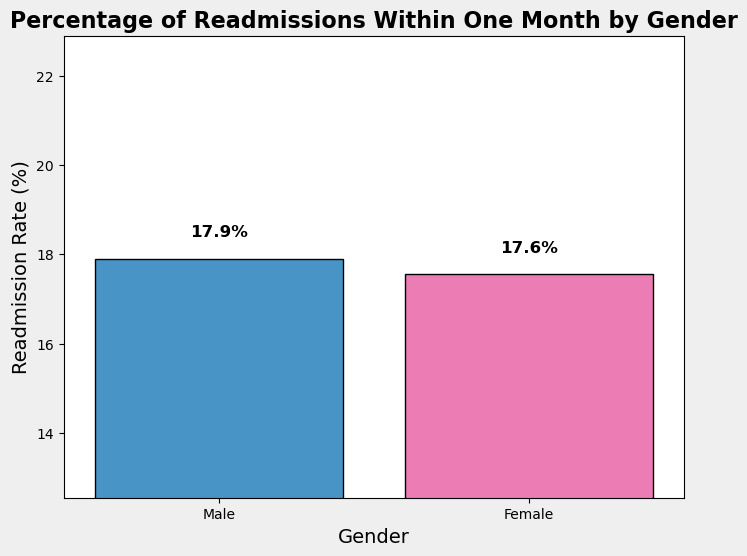

In [30]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import chi2_contingency

# Load data
df = pd.read_excel(input_file)

# Step 1: Remove duplicates and aggregate data per patient
df_patient_status = df.groupby("מספר מטופל רנדומלי").agg({
    "נקבה": "first",  # Keep gender for each patient
    "חזר לאשפוז תוך חודש": lambda x: 1 if (x > 0).any() else 0  # Check if at least one entry is nonzero
}).reset_index()

# Step 2: Count the number of male and female patients who were readmitted within a month
male_readmitted_count = df_patient_status[(df_patient_status["נקבה"] == 0) & 
                                          (df_patient_status["חזר לאשפוז תוך חודש"] == 1)].shape[0]

female_readmitted_count = df_patient_status[(df_patient_status["נקבה"] == 1) & 
                                            (df_patient_status["חזר לאשפוז תוך חודש"] == 1)].shape[0]

# Step 3: Count total unique male and female patients
total_males = df_patient_status[df_patient_status["נקבה"] == 0].shape[0]
total_females = df_patient_status[df_patient_status["נקבה"] == 1].shape[0]

# Convert to percentages
male_readmitted_percent = (male_readmitted_count / total_males) * 100
female_readmitted_percent = (female_readmitted_count / total_females) * 100

# Data for visualization
categories = ["Male", "Female"]
values = [male_readmitted_percent, female_readmitted_percent]
colors = ["#3498db", "#ff69b4"]  # Blue for male, pink for female

# Set background color
background_color = "#efefef"

# Create a bar plot
plt.figure(figsize=(8, 6), facecolor=background_color)
sns.barplot(x=categories, y=values, palette=colors, edgecolor="black")

# Set title and labels
plt.title("Percentage of Readmissions Within One Month by Gender", fontsize=16, fontweight="bold")
plt.xlabel("Gender", fontsize=14)
plt.ylabel("Readmission Rate (%)", fontsize=14)

# Adjust y-axis scale to prevent misleading differences
plt.ylim(min(values) - 5, max(values) + 5)  # Adjusting scale to make bars visually proportional

# Annotate values on bars
for i, v in enumerate(values):
    plt.text(i, v + 0.5, f"{v:.1f}%", ha="center", fontsize=12, fontweight="bold")

# Show plot
plt.show()


C:\Users\hadma\AppData\Local\Temp\ipykernel_21100\1260512514.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=values, palette=colors, edgecolor="black")


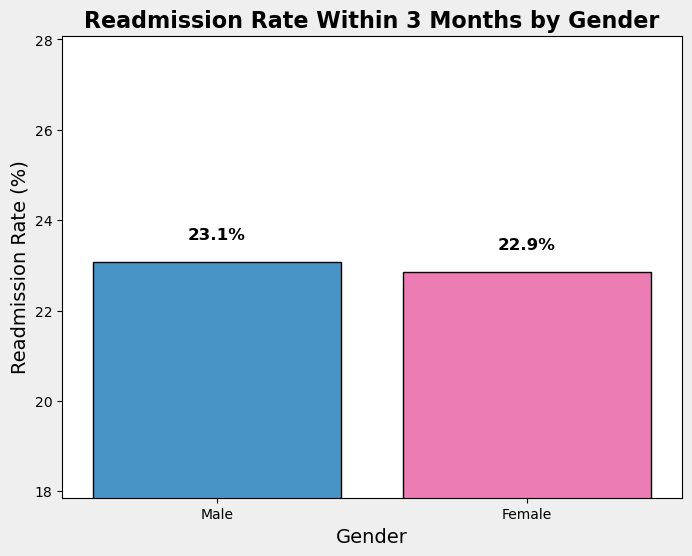

In [31]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_excel(input_file)

# Step 1: Remove duplicates and aggregate data per patient
df_patient_status = df.groupby("מספר מטופל רנדומלי").agg({
    "נקבה": "first",  # Keep gender for each patient
    "חזר לאשפוז תוך 3 חודשים": lambda x: 1 if (x > 0).any() else 0  # Check if at least one entry is nonzero
}).reset_index()

# Step 2: Count the number of male and female patients who were readmitted within three months
male_readmitted_count = df_patient_status[(df_patient_status["נקבה"] == 0) & 
                                          (df_patient_status["חזר לאשפוז תוך 3 חודשים"] == 1)].shape[0]

female_readmitted_count = df_patient_status[(df_patient_status["נקבה"] == 1) & 
                                            (df_patient_status["חזר לאשפוז תוך 3 חודשים"] == 1)].shape[0]

# Step 3: Count total unique male and female patients
total_males = df_patient_status[df_patient_status["נקבה"] == 0].shape[0]
total_females = df_patient_status[df_patient_status["נקבה"] == 1].shape[0]

# Convert to percentages
male_readmitted_percent = (male_readmitted_count / total_males) * 100
female_readmitted_percent = (female_readmitted_count / total_females) * 100

# Data for visualization
categories = ["Male", "Female"]
values = [male_readmitted_percent, female_readmitted_percent]
colors = ["#3498db", "#ff69b4"]  # Blue for male, pink for female

# Set background color
background_color = "#efefef"

# Create a bar plot
plt.figure(figsize=(8, 6), facecolor=background_color)
sns.barplot(x=categories, y=values, palette=colors, edgecolor="black")

# Set title and labels (shortened title)
plt.title("Readmission Rate Within 3 Months by Gender", fontsize=16, fontweight="bold")
plt.xlabel("Gender", fontsize=14)
plt.ylabel("Readmission Rate (%)", fontsize=14)

# Adjust y-axis scale to make bars visually proportional
plt.ylim(min(values) - 5, max(values) + 5)

# Annotate values on bars
for i, v in enumerate(values):
    plt.text(i, v + 0.5, f"{v:.1f}%", ha="center", fontsize=12, fontweight="bold")

# Show the plot
plt.show()


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
df = pd.read_excel(input_file)
# הסרת כפילויות לפי מספר מטופל רנדומלי
df_unique_patients_final = df.drop_duplicates(subset=['מספר מטופל רנדומלי']).copy()

# המרת מספר האשפוזים לערך בינארי (1 אם היה אשפוז, 0 אם לא)
df_unique_patients_final['was_hospitalized'] = (df_unique_patients_final[hospitalization_column] > 0).astype(int)

# חישוב כמות המטופלים בכל מצב משפחתי
marital_status_counts = df_unique_patients_final[marital_status_columns_filtered].sum()

# שינוי שמות הקטגוריות לאנגלית
marital_status_counts.index = ["Widowed", "Divorced", "Married", "Single"]

# סידור העמודות מהגדול לקטן
marital_status_counts = marital_status_counts.sort_values(ascending=False)

# ביצוע מבחן חי-בריבוע לבדיקת קשר בין מצב משפחתי לאשפוז
chi2_stat, p_value, dof, expected = chi2_contingency(marital_status_counts.to_frame().T)

# הצגת תוצאות המבחן הסטטיסטי
chi2_results = {
    "Chi-Square Statistic": chi2_stat,
    "p-value": p_value,
    "Degrees of Freedom": dof
}

# יצירת גרף ויזואלי משופר
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(marital_status_counts.index, marital_status_counts.values, 
              color=['#4c72b0', '#dd8452', '#55a868', '#c44e52'])

# הוספת כמות המטופלים מעל כל עמודה
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 50, f'{int(height)}', 
            ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

# עיצוב הגרף
ax.set_title('Number of Patients by Marital Status', fontsize=14, fontweight='bold')
ax.set_xlabel('Marital Status', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of Patients', fontsize=12, fontweight='bold')
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_facecolor('white')  # רקע פנימי לבן

# עיצוב רקע חיצוני באפור בהיר (#efefef)
fig.patch.set_facecolor('#efefef')

# הצגת הגרף
plt.xticks(rotation=0, fontsize=12, fontweight='bold')
plt.show()

# הצגת תוצאות המבחן הסטטיסטי
chi2_results


NameError: name 'hospitalization_column' is not defined

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# הסרת כפילויות לפי מספר מטופל רנדומלי
df_unique_patients_final = df.drop_duplicates(subset=['מספר מטופל רנדומלי']).copy()

# יצירת עמודת חזרה לאשפוז: לכל מטופל, אם יש לפחות אשפוז חוזר אחד (ערך > 0) בעמודת "מספר אשפוז חוזר", הוא יסומן כחוזר לאשפוז
readmission_status = df.groupby('מספר מטופל רנדומלי')['מספר אשפוז חוזר'].apply(lambda x: 1 if (x > 0).any() else 0)

# שילוב עמודת חזרה לאשפוז בטבלת המטופלים הייחודיים
df_unique_patients_final = df_unique_patients_final.set_index('מספר מטופל רנדומלי')
df_unique_patients_final['was_readmitted'] = readmission_status

# מילוי ערכים חסרים (במידה ויש)
df_unique_patients_final['was_readmitted'].fillna(0, inplace=True)

# הגדרת קטגוריות מצב משפחתי, תוך התעלמות מהקטגוריה "לא ידוע"
marital_status_columns_filtered = [col for col in df.columns if 'מצב משפחתי' in col and 'לא ידוע' not in col]

# יצירת עמודת מצב משפחתי ייחודי לכל מטופל
df_unique_patients_final['marital_status'] = df_unique_patients_final[marital_status_columns_filtered].idxmax(axis=1)
df_unique_patients_final['marital_status'] = df_unique_patients_final['marital_status'].str.replace('מצב משפחתי_', '')

# יצירת טבלת שכיחות של מצב משפחתי מול חזרה לאשפוז
marital_status_vs_readmission = pd.crosstab(df_unique_patients_final['marital_status'], df_unique_patients_final['was_readmitted'])
marital_status_vs_readmission.rename(index={"אלמן/ה": "Widowed", "גרוש/ה": "Divorced", "נשוי/ה": "Married", "רווק/ה": "Single"}, inplace=True)

# ביצוע מבחן חי-בריבוע
chi2_readmission, p_readmission, dof_readmission, expected_readmission = chi2_contingency(marital_status_vs_readmission)

# הצגת תוצאות
print(f"Chi-Square Statistic: {chi2_readmission:.2f}")
print(f"p-value: {p_readmission:.8f}")

# יצירת גרף להצגת תוצאות
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(marital_status_vs_readmission.index, marital_status_vs_readmission[1],
              color=['#4c72b0', '#55a868', '#dd8452', '#c44e52'])

# הוספת כמות המטופלים מעל כל עמודה
for bar in bars:
    height = bar.get_height()
# עיצוב הגרף
ax.set_title('General Readmission by Marital Status', fontsize=14, fontweight='bold')
ax.set_xlabel('Marital Status', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of Readmitted Patients', fontsize=12, fontweight='bold')
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_facecolor('white')  # רקע פנימי לבן

    ax.text(bar.get_x() + bar.get_width() / 2, height + 10, f'{int(height)}',
            ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

# עיצוב רקע חיצוני באפור בהיר (#efefef)
fig.patch.set_facecolor('#efefef')

# הצגת הגרף
plt.xticks(rotation=0, fontsize=12, fontweight='bold')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
df = pd.read_excel(input_file)
# הסרת כפילויות לפי מספר מטופל רנדומלי
df_unique_patients_final = df.drop_duplicates(subset=['מספר מטופל רנדומלי']).copy()

# יצירת עמודת חזרה לאשפוז: לכל מטופל, אם יש לפחות אשפוז חוזר אחד (ערך > 0) בעמודת "מספר אשפוז חוזר", הוא יסומן כחוזר לאשפוז
readmission_status = df.groupby('מספר מטופל רנדומלי')['חזר לאשפוז תוך חודש'].apply(lambda x: 1 if (x > 0).any() else 0)

# שילוב עמודת חזרה לאשפוז בטבלת המטופלים הייחודיים
df_unique_patients_final = df_unique_patients_final.set_index('מספר מטופל רנדומלי')
df_unique_patients_final['was_readmitted'] = readmission_status

# מילוי ערכים חסרים (במידה ויש)
df_unique_patients_final['was_readmitted'].fillna(0, inplace=True)

# הגדרת קטגוריות מצב משפחתי, תוך התעלמות מהקטגוריה "לא ידוע"
marital_status_columns_filtered = [col for col in df.columns if 'מצב משפחתי' in col and 'לא ידוע' not in col]

# יצירת עמודת מצב משפחתי ייחודי לכל מטופל
df_unique_patients_final['marital_status'] = df_unique_patients_final[marital_status_columns_filtered].idxmax(axis=1)
df_unique_patients_final['marital_status'] = df_unique_patients_final['marital_status'].str.replace('מצב משפחתי_', '')

# יצירת עותק של הנתונים
df_month_readmission = df.copy()

# קביעת חזרה לאשפוז תוך חודש: לכל מטופל, אם יש לפחות ערך אחד > 0 בעמודת "חזר לאשפוז תוך חודש", נסמן אותו כמי שחזר לאשפוז תוך חודש
month_readmission_status = df_month_readmission.groupby('מספר מטופל רנדומלי')['חזר לאשפוז תוך חודש'].apply(lambda x: 1 if (x > 0).any() else 0)

# שילוב עמודת חזרה לאשפוז תוך חודש בטבלת המטופלים הייחודיים
df_unique_patients_final['was_readmitted_within_month'] = month_readmission_status

# מילוי ערכים חסרים (במקרה של מטופלים ללא מידע על חזרה תוך חודש)
df_unique_patients_final['was_readmitted_within_month'].fillna(0, inplace=True)

# יצירת טבלת שכיחות של מצב משפחתי מול חזרה לאשפוז תוך חודש
marital_status_vs_3month_readmission = pd.crosstab(df_unique_patients_final['marital_status'], df_unique_patients_final['was_readmitted_within_month'])

# ביצוע מבחן חי-בריבוע
chi2_month_readmission, p_month_readmission, dof_month_readmission, expected_month_readmission = chi2_contingency(marital_status_vs_3month_readmission)

# הצגת תוצאות
print(f"Chi-Square Statistic: {chi2_month_readmission:.2f}")
print(f"p-value: {p_month_readmission:.8f}")

# שינוי שמות הקטגוריות לאנגלית וסידורם מהגדול לקטן
marital_status_vs_3month_readmission.rename(index={"אלמן/ה": "Widowed", "גרוש/ה": "Divorced", "נשוי/א": "Married", "רווק/ה": "Single"}, inplace=True)
marital_status_vs_3month_readmission = marital_status_vs_3month_readmission.sort_values(by=1, ascending=False)

# יצירת גרף ויזואלי משופר
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(marital_status_vs_3month_readmission.index, marital_status_vs_3month_readmission[1],
              color=['#4c72b0', '#dd8452', '#55a868', '#c44e52'])

# הוספת כמות המטופלים מעל כל עמודה
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 10, f'{int(height)}',
            ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

# עיצוב הגרף
ax.set_title('Readmission Within a Month by Marital Status', fontsize=14, fontweight='bold')
ax.set_xlabel('Marital Status', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of Patients', fontsize=12, fontweight='bold')
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_facecolor('white')  # רקע פנימי לבן

# עיצוב רקע חיצוני באפור בהיר (#efefef)
fig.patch.set_facecolor('#efefef')

# הצגת הגרף
plt.xticks(rotation=0, fontsize=12, fontweight='bold')
plt.show() 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
df = pd.read_excel(input_file)
# הסרת כפילויות לפי מספר מטופל רנדומלי
df_unique_patients_final = df.drop_duplicates(subset=['מספר מטופל רנדומלי']).copy()

# יצירת עמודת חזרה לאשפוז: לכל מטופל, אם יש לפחות אשפוז חוזר אחד (ערך > 0) בעמודת "מספר אשפוז חוזר", הוא יסומן כחוזר לאשפוז
readmission_status = df.groupby('מספר מטופל רנדומלי')['מספר אשפוז חוזר'].apply(lambda x: 1 if (x > 0).any() else 0)

# שילוב עמודת חזרה לאשפוז בטבלת המטופלים הייחודיים
df_unique_patients_final = df_unique_patients_final.set_index('מספר מטופל רנדומלי')
df_unique_patients_final['was_readmitted'] = readmission_status

# מילוי ערכים חסרים (במידה ויש)
df_unique_patients_final['was_readmitted'].fillna(0, inplace=True)

# הגדרת קטגוריות מצב משפחתי, תוך התעלמות מהקטגוריה "לא ידוע"
marital_status_columns_filtered = [col for col in df.columns if 'מצב משפחתי' in col and 'לא ידוע' not in col]

# יצירת עמודת מצב משפחתי ייחודי לכל מטופל
df_unique_patients_final['marital_status'] = df_unique_patients_final[marital_status_columns_filtered].idxmax(axis=1)
df_unique_patients_final['marital_status'] = df_unique_patients_final['marital_status'].str.replace('מצב משפחתי_', '')

# יצירת טבלת שכיחות של מצב משפחתי מול חזרה לאשפוז
marital_status_vs_readmission = pd.crosstab(df_unique_patients_final['marital_status'], df_unique_patients_final['was_readmitted'])
marital_status_vs_readmission.rename(index={"אלמן/ה": "Widowed", "גרוש/ה": "Divorced", "נשוי/א": "Married", "רווק/ה": "Single"}, inplace=True)
marital_status_vs_readmission = marital_status_vs_readmission.sort_values(by=1, ascending=False)

# ביצוע מבחן חי-בריבוע
chi2_readmission, p_readmission, dof_readmission, expected_readmission = chi2_contingency(marital_status_vs_readmission)

# הצגת תוצאות
print(f"Chi-Square Statistic: {chi2_readmission:.2f}")
print(f"p-value: {p_readmission:.8f}")

# יצירת גרף להצגת תוצאות
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(marital_status_vs_readmission.index, marital_status_vs_readmission[1],
              color=['#4c72b0', '#55a868', '#dd8452', '#c44e52'])

# הוספת כמות המטופלים מעל כל עמודה
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 10, f'{int(height)}',
            ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

# עיצוב הגרף
ax.set_title('General Readmission by Marital Status', fontsize=14, fontweight='bold')
ax.set_xlabel('Marital Status', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of Readmitted Patients', fontsize=12, fontweight='bold')
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_facecolor('white')  # רקע פנימי לבן

# עיצוב רקע חיצוני באפור בהיר (#efefef)
fig.patch.set_facecolor('#efefef')

# הצגת הגרף
plt.xticks(rotation=0, fontsize=12, fontweight='bold')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
df = pd.read_excel(input_file)
# הסרת כפילויות לפי מספר מטופל רנדומלי
df_unique_patients_final = df.drop_duplicates(subset=['מספר מטופל רנדומלי']).copy()

# יצירת עמודת חזרה לאשפוז: לכל מטופל, אם יש לפחות אשפוז חוזר אחד (ערך > 0) בעמודת "מספר אשפוז חוזר", הוא יסומן כחוזר לאשפוז
readmission_status = df.groupby('מספר מטופל רנדומלי')['חזר לאשפוז תוך 3 חודשים'].apply(lambda x: 1 if (x > 0).any() else 0)

# שילוב עמודת חזרה לאשפוז בטבלת המטופלים הייחודיים
df_unique_patients_final = df_unique_patients_final.set_index('מספר מטופל רנדומלי')
df_unique_patients_final['was_readmitted'] = readmission_status

# מילוי ערכים חסרים (במידה ויש)
df_unique_patients_final['was_readmitted'].fillna(0, inplace=True)

# הגדרת קטגוריות מצב משפחתי, תוך התעלמות מהקטגוריה "לא ידוע"
marital_status_columns_filtered = [col for col in df.columns if 'מצב משפחתי' in col and 'לא ידוע' not in col]

# יצירת עמודת מצב משפחתי ייחודי לכל מטופל
df_unique_patients_final['marital_status'] = df_unique_patients_final[marital_status_columns_filtered].idxmax(axis=1)
df_unique_patients_final['marital_status'] = df_unique_patients_final['marital_status'].str.replace('מצב משפחתי_', '')

# יצירת עותק של הנתונים
df_month_readmission = df.copy()

# קביעת חזרה לאשפוז תוך חודש: לכל מטופל, אם יש לפחות ערך אחד > 0 בעמודת "חזר לאשפוז תוך חודש", נסמן אותו כמי שחזר לאשפוז תוך חודש
three_month_readmission_status = df_month_readmission.groupby('מספר מטופל רנדומלי')['חזר לאשפוז תוך 3 חודשים'].apply(lambda x: 1 if (x > 0).any() else 0)

# שילוב עמודת חזרה לאשפוז תוך חודש בטבלת המטופלים הייחודיים
df_unique_patients_final['was_readmitted_within_month'] = three_month_readmission_status

# מילוי ערכים חסרים (במקרה של מטופלים ללא מידע על חזרה תוך חודש)
df_unique_patients_final['was_readmitted_within_month'].fillna(0, inplace=True)

# יצירת טבלת שכיחות של מצב משפחתי מול חזרה לאשפוז תוך חודש
marital_status_vs_3month_readmission = pd.crosstab(df_unique_patients_final['marital_status'], df_unique_patients_final['was_readmitted_within_month'])

# ביצוע מבחן חי-בריבוע
chi2_month_readmission, p_month_readmission, dof_month_readmission, expected_month_readmission = chi2_contingency(marital_status_vs_3month_readmission)

# הצגת תוצאות
print(f"Chi-Square Statistic: {chi2_month_readmission:.2f}")
print(f"p-value: {p_month_readmission:.8f}")

# שינוי שמות הקטגוריות לאנגלית וסידורם מהגדול לקטן
marital_status_vs_3month_readmission.rename(index={"אלמן/ה": "Widowed", "גרוש/ה": "Divorced", "נשוי/א": "Married", "רווק/ה": "Single"}, inplace=True)
marital_status_vs_3month_readmission = marital_status_vs_3month_readmission.sort_values(by=1, ascending=False)

# יצירת גרף ויזואלי משופר
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(marital_status_vs_3month_readmission.index, marital_status_vs_3month_readmission[1],
              color=['#4c72b0', '#dd8452', '#55a868', '#c44e52'])

# הוספת כמות המטופלים מעל כל עמודה
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 10, f'{int(height)}',
            ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

# עיצוב הגרף
ax.set_title('Readmission Within a Month by Marital Status', fontsize=14, fontweight='bold')
ax.set_xlabel('Marital Status', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of Patients', fontsize=12, fontweight='bold')
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_facecolor('white')  # רקע פנימי לבן

# עיצוב רקע חיצוני באפור בהיר (#efefef)
fig.patch.set_facecolor('#efefef')

# הצגת הגרף
plt.xticks(rotation=0, fontsize=12, fontweight='bold')
plt.show() 

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# קריאת קובץ Excel
df = pd.read_excel(input_file)
# הסרת כפילויות לפי מספר מטופל רנדומלי
df = df.drop_duplicates(subset='מספר מטופל רנדומלי')

# תרגום שמות עמודות מעברית לאנגלית
columns_translation = {
    'מצב משפחתי_אלמן/ה': 'Widowed',
    'מצב משפחתי_גרוש/ה': 'Divorced',
    'מצב משפחתי_נשוי/א': 'Married',
    'מצב משפחתי_רווק/ה': 'Single'
}

df = df.rename(columns=columns_translation)

# רשימת מצבי משפחה
marital_status_columns = list(columns_translation.values())

# ספירת מספר המטופלים בכל מצב משפחתי
status_counts = df[marital_status_columns].sum()

# מיון מהגדול לקטן
status_counts = status_counts.sort_values(ascending=False)

# חישוב אחוזים
status_percentage = (status_counts / status_counts.sum()) * 100

# צבעים מותאמים לכל קטגוריה
colors = {
    'Single': '#4c72b0',  # כחול
    'Married': '#dd8452',  # כתום
    'Divorced': '#55a868',  # ירוק
    'Widowed': '#c44e52'  # אדום
}

# יצירת גרף השוואתי עם רקע אפור בהיר
plt.figure(figsize=(10, 6), facecolor='#efefef')
ax = plt.gca()
ax.set_facecolor('#efefef')

bars = plt.bar(status_counts.index, status_counts.values, color=[colors[status] for status in status_counts.index], edgecolor='black')

# הגדלת הטווח כדי למנוע חיתוך של המספרים
plt.ylim(0, max(status_counts.values) * 1.25)

# הוספת מספרים ואחוזים על כל עמודה
for bar, count, percent in zip(bars, status_counts.values, status_percentage):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + max(status_counts.values) * 0.03,
             f"{count}\n({percent:.1f}%)", ha='center', fontsize=12, fontweight='bold', color='black')

# עיצוב הכותרות והתוויות
plt.title('Number of Patients by Marital Status', fontsize=18, fontweight='bold', color='#333333')
plt.xlabel('Marital Status', fontsize=14, fontweight='bold', color='#555555')
plt.ylabel('Number of Patients', fontsize=14, fontweight='bold', color='#555555')

# עיצוב שמות המצבים בציר ה-X
plt.xticks(rotation=0, fontsize=12, fontweight='bold')

# הוספת רשת קלה
plt.grid(axis='y', linestyle='--', alpha=0.6)

# הצגת הגרף
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# קריאת קובץ ה-Excel
df = pd.read_excel(input_file)

# הסרת כפילויות של המטופלים על פי מספר המטופל
df_unique_patients = df.drop_duplicates(subset=["מספר מטופל רנדומלי"])

# סינון נתונים - התעלמות מהמקרים עם מצב משפחתי "לא ידוע"
df_unique_patients_filtered = df_unique_patients[df_unique_patients['מצב משפחתי_לא ידוע'] == 0]

# חישוב ההתפלגות של המצב המשפחתי אחרי התעלמות מהמקרים "לא ידוע"
family_status_columns = ["מצב משפחתי_אלמן/ה", "מצב משפחתי_גרוש/ה", "מצב משפחתי_נשוי/א", "מצב משפחתי_רווק/ה"]
observed_counts = [df_unique_patients_filtered[status].sum() for status in family_status_columns]

# האוכלוסייה הכללית (בהתעלם מהמצב "לא ידוע")
population_distribution = {
    "מצב משפחתי_רווק/ה": 0.236,  # 23.6%
    "מצב משפחתי_נשוי/א": 0.596,  # 59.6%
    "מצב משפחתי_גרוש/ה": 0.385,  # 38.5%
    "מצב משפחתי_אלמן/ה": 0.057   # 5.7%
}

# חישוב התפלגות צפויה בהתבסס על אוכלוסיית המטופלים (ללא מצב "לא ידוע")
total_patients = sum(observed_counts)  # סך כל המטופלים הייחודיים
total_population = 10027000  # אוכלוסיית ישראל (10.027 מיליון)
expected_scaled = [round(p * total_patients / total_population) for p in [population_distribution[status] for status in family_status_columns]]

# ביצוע מבחן Chi-square
chi2_stat, p_value, dof, expected_values = chi2_contingency([observed_counts, expected_scaled])

# הצגת תוצאות המבחן
print("Chi-square Statistic:", chi2_stat)
print("p-value:", p_value)

# ויזואליזציה
categories = family_status_columns
bar_width = 0.4
x = np.arange(len(categories))
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]  # צבעים שונים לכל מצב משפחתי

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(x - bar_width/2, observed_counts, bar_width, color=colors, alpha=0.7, edgecolor="black", label="Observed")
ax.bar(x + bar_width/2, expected_scaled, bar_width, color=colors, alpha=0.7, edgecolor="black", label="Expected", hatch='//')

# הוספת טקסט מעל העמודות עם אחוזים
for i in range(len(categories)):
    observed_percent = (observed_counts[i] / total_patients) * 100
    expected_percent = (expected_scaled[i] / total_patients) * 100
    y_offset = max(observed_counts[i], expected_scaled[i]) * 0.04  # Adjust text to stay inside the plot
    ax.text(x[i] - bar_width/2, observed_counts[i] + y_offset, f"{observed_counts[i]}\n({observed_percent:.1f}%)", ha='center', fontsize=12, fontweight="bold")
    ax.text(x[i] + bar_width/2, expected_scaled[i] + y_offset, f"{expected_scaled[i]}\n({expected_percent:.1f}%)", ha='center', fontsize=12, fontweight="bold")

ax.set_xlabel("Family Status", fontsize=12)
ax.set_ylabel("Number of Patients", fontsize=12)
ax.set_title("Observed vs. Expected Family Status Distribution", fontsize=14, fontweight="bold")
ax.set_xticks(x)
ax.set_xticklabels(categories, fontsize=12)
ax.legend()
fig.patch.set_facecolor("#efefef")
ax.set_facecolor("#efefef")
plt.ylim(0, max(max(observed_counts), max(expected_scaled)) * 1.15)  # Ensure labels don't go outside the plot
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_excel(input_file)

# תרגום שמות עמודות מעברית לאנגלית
columns_translation = {
    'מצב משפחתי_אלמן/ה': 'Widowed',
    'מצב משפחתי_גרוש/ה': 'Divorced',
    'מצב משפחתי_נשוי/א': 'Married',
    'מצב משפחתי_רווק/ה': 'Single'
}
df = df.rename(columns=columns_translation)

# הסרת כפילויות לפי מספר מטופל רנדומלי
df_unique = df.drop_duplicates(subset='מספר מטופל רנדומלי')

# יצירת עמודת מצב משפחתי ייחודית לכל מטופל
df_unique['marital_status'] = df_unique[list(columns_translation.values())].idxmax(axis=1)

# ספירת מספר המטופלים בכל קטגוריית מצב משפחתי (ללא קשר לחזרה לאשפוז)
total_patients = df_unique['marital_status'].value_counts()

# יצירת עמודת חזרה לאשפוז תוך 3 חודשים
readmission_status_3months = df.groupby('מספר מטופל רנדומלי')['חזר לאשפוז תוך 3 חודשים'].apply(lambda x: 1 if (x > 0).any() else 0)

# שילוב הנתון לטבלת המטופלים
df_unique = df_unique.set_index('מספר מטופל רנדומלי')
df_unique['was_readmitted_within_3months'] = readmission_status_3months

# יצירת טבלת שכיחות של מצב משפחתי מול חזרה לאשפוז תוך 3 חודשים
marital_status_vs_3month_readmission = pd.crosstab(df_unique['marital_status'], df_unique['was_readmitted_within_3months'])

# יצירת טבלת השוואה בין כלל המאושפזים לאלו שחזרו לאשפוז תוך 3 חודשים
comparison_df_3months = pd.DataFrame({
    'Total Patients': total_patients,
    'Readmitted Patients (3 Months)': marital_status_vs_3month_readmission[1]
}).fillna(0)

# חישוב אחוזי החזרה לאשפוז לכל קטגוריה תוך 3 חודשים
comparison_df_3months['Readmission Percentage'] = (comparison_df_3months['Readmitted Patients (3 Months)'] / comparison_df_3months['Total Patients']) * 100

# מיון הנתונים מהגדול לקטן לפי מספר כלל המאושפזים
comparison_df_3months = comparison_df_3months.sort_values(by='Total Patients', ascending=False)

# צבעים מותאמים לכל קטגוריה
colors = {
    'Single': '#4c72b0',  # כחול
    'Married': '#dd8452',  # כתום
    'Divorced': '#55a868',  # ירוק
    'Widowed': '#c44e52'   # אדום
}

# יצירת גרף עמודות מקובצות להשוואה עם גבול בין העמודות ושילוב אחוזים וכמות
fig, ax = plt.subplots(figsize=(10, 6), facecolor='#efefef')
ax.set_facecolor('#efefef')

bar_width = 0.4  # רוחב עמודה
x = np.arange(len(comparison_df_3months.index))  # מיקום קטגוריות

# יצירת העמודות
bars1 = ax.bar(x - bar_width/2, comparison_df_3months['Total Patients'], bar_width,
               color=[colors[status] for status in comparison_df_3months.index], edgecolor='black', label='Total Patients')

bars2 = ax.bar(x + bar_width/2, comparison_df_3months['Readmitted Patients (3 Months)'], bar_width,
               color=[colors[status] for status in comparison_df_3months.index], edgecolor='black', hatch='///', 
               label='Readmitted Patients (3 Months)')

# הוספת מספרים מעל כל עמודה ראשונה (סך הכל מאושפזים)
for bar in bars1:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 10, f'{int(height)}', ha='center', va='bottom',
            fontsize=12, fontweight='bold', color='black')

# הוספת אחוזים וכמות מעל עמודות מספר אשפוז חוזר (עם קווים)
for bar, percent, count in zip(bars2, comparison_df_3months['Readmission Percentage'], comparison_df_3months['Readmitted Patients (3 Months)']):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 10, f'{percent:.1f}%\n({int(count)})', ha='center', va='bottom',
            fontsize=12, fontweight='bold', color='black')

# עיצוב הגרף
ax.set_title('Comparison of Total and 3-Month Readmitted Patients by Marital Status', fontsize=14, fontweight='bold')
ax.set_xlabel('Marital Status', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of Patients', fontsize=12, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(comparison_df_3months.index, fontsize=12, fontweight='bold')

# הוספת קווי רשת
ax.grid(axis='y', linestyle='--', alpha=0.7)

# הוספת מקרא
ax.legend(fontsize=12, loc='upper right')

# הצגת הגרף
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Load the Excel file
df = pd.read_excel(input_file)

# Remove duplicate patient IDs to get unique patients
df_unique_patients = df.drop_duplicates(subset=["מספר מטופל רנדומלי"])

# Count number of men (0) and women (1) in the "נקבה" column
gender_counts = df_unique_patients["נקבה"].value_counts()
observed = [gender_counts.get(0, 0), gender_counts.get(1, 0)]  # [Men, Women] from dataset
total_patients = sum(observed)  # Total number of unique patients in dataset

# General population distribution in Israel (2024 estimates)
total_population = 10027000  # Total population in Israel (10.027 million)
expected_proportions = [0.495, 0.505]  # Gender distribution in general population
expected = [round(total_population * p) for p in expected_proportions]  # Rounded expected values

# Adjust expected counts to match the scale of the dataset
expected_scaled = [round(p * total_patients / total_population) for p in expected]

# Perform Chi-square test
chi2_stat, p_value, dof, expected_values = chi2_contingency([observed, expected_scaled])

# Print results
print("Chi-square Statistic:", chi2_stat)
print("p-value:", p_value)

# Visualization
categories = ["Men", "Women"]
bar_width = 0.4
x = np.arange(len(categories))
colors = ["blue", "#D63384"]  # Blue for Men, Dark Pink for Women

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(x - bar_width/2, observed, bar_width, color=colors, alpha=0.7, edgecolor="black", label="Observed")
ax.bar(x + bar_width/2, expected_scaled, bar_width, color=colors, alpha=0.7, edgecolor="black", label="Expected", hatch='//')

# Add text annotations above bars with percentages
for i in range(len(categories)):
    observed_percent = (observed[i] / total_patients) * 100
    expected_percent = (expected_scaled[i] / total_patients) * 100
    y_offset = max(observed[i], expected_scaled[i]) * 0.04  # Adjust text to stay inside the plot
    ax.text(x[i] - bar_width/2, observed[i] + y_offset, f"{observed[i]}\n({observed_percent:.1f}%)", ha='center', fontsize=12, fontweight="bold")
    ax.text(x[i] + bar_width/2, expected_scaled[i] + y_offset, f"{expected_scaled[i]}\n({expected_percent:.1f}%)", ha='center', fontsize=12, fontweight="bold")

ax.set_xlabel("Gender", fontsize=12)
ax.set_ylabel("Number of Hospitalized Patients", fontsize=12)
ax.set_title("Observed vs. Expected Hospitalizations by Gender", fontsize=14, fontweight="bold")
ax.set_xticks(x)
ax.set_xticklabels(categories, fontsize=12)
ax.legend()
fig.patch.set_facecolor("#efefef")
ax.set_facecolor("#efefef")
plt.ylim(0, max(max(observed), max(expected_scaled)) * 1.15)  # Ensure labels don't go outside the plot
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# קריאת קובץ ה-Excel
df = pd.read_excel(input_file)

# הסרת כפילויות של המטופלים על פי מספר המטופל
df_unique_patients = df.drop_duplicates(subset=["מספר מטופל רנדומלי"])

# סינון נתונים - התעלמות מהמקרים עם מצב משפחתי "לא ידוע"
df_unique_patients_filtered = df_unique_patients[df_unique_patients['מצב משפחתי_לא ידוע'] == 0]

# חישוב ההתפלגות של המצב המשפחתי אחרי התעלמות מהמקרים "לא ידוע"
family_status_columns = ["מצב משפחתי_אלמן/ה", "מצב משפחתי_גרוש/ה", "מצב משפחתי_נשוי/א", "מצב משפחתי_רווק/ה"]
observed_counts = [df_unique_patients_filtered[status].sum() for status in family_status_columns]

# הדפסת תוצאות להתוודע לבעיה
print("Observed counts:", observed_counts)

# הסרת קטגוריות אם יש בהם אפס מטופלים
observed_counts_filtered = [count for count in observed_counts if count > 0]
family_status_columns_filtered = [status for i, status in enumerate(family_status_columns) if observed_counts[i] > 0]

# האוכלוסייה הכללית
population_distribution = {
    "מצב משפחתי_רווק/ה": 0.236,  # 23.6%
    "מצב משפחתי_נשוי/א": 0.596,  # 59.6%
    "מצב משפחתי_גרוש/ה": 0.385,  # 38.5%
    "מצב משפחתי_אלמן/ה": 0.057   # 5.7%
}

# חישוב התפלגות צפויה בהתבסס על אוכלוסיית המטופלים (ללא קטגוריות עם אפס מטופלים)
total_patients = sum(observed_counts_filtered)  # סך כל המטופלים הייחודיים
total_population = 10027000  # אוכלוסיית ישראל (10.027 מיליון)
expected_scaled = [round(p * total_patients / total_population) for p in [population_distribution[status] for status in family_status_columns_filtered]]

# ביצוע מבחן Chi-square
chi2_stat, p_value, dof, expected_values = chi2_contingency([observed_counts_filtered, expected_scaled])

# הצגת תוצאות המבחן
print("Chi-square Statistic:", chi2_stat)
print("p-value:", p_value)

# ויזואליזציה
categories = family_status_columns_filtered
bar_width = 0.4
x = np.arange(len(categories))
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]  # צבעים שונים לכל מצב משפחתי

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(x - bar_width/2, observed_counts_filtered, bar_width, color=colors, alpha=0.7, edgecolor="black", label="Observed")
ax.bar(x + bar_width/2, expected_scaled, bar_width, color=colors, alpha=0.7, edgecolor="black", label="Expected", hatch='//')

# הוספת טקסט מעל העמודות עם אחוזים
for i in range(len(categories)):
    observed_percent = (observed_counts_filtered[i] / total_patients) * 100
    expected_percent = (expected_scaled[i] / total_patients) * 100
    y_offset = max(observed_counts_filtered[i], expected_scaled[i]) * 0.04  # Adjust text to stay inside the plot
    ax.text(x[i] - bar_width/2, observed_counts_filtered[i] + y_offset, f"{observed_counts_filtered[i]}\n({observed_percent:.1f}%)", ha='center', fontsize=12, fontweight="bold")
    ax.text(x[i] + bar_width/2, expected_scaled[i] + y_offset, f"{expected_scaled[i]}\n({expected_percent:.1f}%)", ha='center', fontsize=12, fontweight="bold")

ax.set_xlabel("Family Status", fontsize=12)
ax.set_ylabel("Number of Patients", fontsize=12)
ax.set_title("Observed vs. Expected Family Status Distribution", fontsize=14, fontweight="bold")
ax.set_xticks(x)
ax.set_xticklabels(categories, fontsize=12)
ax.legend()
fig.patch.set_facecolor("#efefef")
ax.set_facecolor("#efefef")
plt.ylim(0, max(max(observed_counts_filtered), max(expected_scaled)) * 1.15)  # Ensure labels don't go outside the plot
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

# טעינת הנתונים מהקובץ
df = pd.read_excel(input_file)

# הסרת מטופלים עם מצב משפחתי לא ידוע
df = df[df['מצב משפחתי_לא ידוע'] != 1]

# הסרת כפילויות לפי מספר מטופל
df = df.drop_duplicates(subset=['מספר מטופל רנדומלי'])

# חישוב התפלגות מצבי המשפחה
marital_columns = ['מצב משפחתי_אלמן/ה', 'מצב משפחתי_גרוש/ה', 'מצב משפחתי_נשוי/א', 'מצב משפחתי_רווק/ה']
marital_distribution = df[marital_columns].sum()

# נתונים נצפים (Observed) - מהקובץ
observed_counts = marital_distribution.values

# נתונים צפויים (Expected) - מהאוכלוסייה הכללית בישראל (באחוזים)
population_percentages = np.array([0.007, 0.175, 0.354, 0.463])  # אלמנים, גרושים, נשואים, רווקים
total_patients = sum(observed_counts)
expected_counts = (population_percentages / population_percentages.sum()) * total_patients

# מבחן כי-בריבוע לבדיקה האם יש הבדל מובהק בין המטופלים לכלל האוכלוסייה
chi2_stat, p_value = stats.chisquare(f_obs=observed_counts, f_exp=expected_counts)

# מיון הקטגוריות מהגדול לקטן לפי הנתונים באקסל
categories = ["Widowed", "Divorced", "Married", "Single"]
sorted_indices = np.argsort(-observed_counts)  # מיון יורד
categories_sorted = [categories[i] for i in sorted_indices]
observed_counts_sorted = observed_counts[sorted_indices]
expected_counts_sorted = expected_counts[sorted_indices]

# צבעים מסודרים לפי סדר הקטגוריות החדש
color_mapping = {
    "Single": "#1f77b4",  # כחול יפה
    "Married": "#ff7f0e",  # כתום יפה
    "Divorced": "#2ca02c",  # ירוק יפה
    "Widowed": "#d62728",  # אדום יפה
}
colors_sorted = [color_mapping[categories_sorted[i]] for i in range(len(categories_sorted))]

# יצירת הוויזואליזציה
x = np.arange(len(categories_sorted))
fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.4

ax.bar(x - bar_width/2, observed_counts_sorted, bar_width, color=colors_sorted, alpha=0.7, edgecolor="black", label="Observed")
ax.bar(x + bar_width/2, expected_counts_sorted, bar_width, color=colors_sorted, alpha=0.7, edgecolor="black", label="Expected", hatch='//')

# הוספת אחוזים מעל העמודות עם טקסט מוקטן יותר למניעת חפיפות
for i in range(len(categories_sorted)):
    observed_percent = (observed_counts_sorted[i] / total_patients) * 100
    expected_percent = (expected_counts_sorted[i] / total_patients) * 100
    y_offset = max(observed_counts_sorted[i], expected_counts_sorted[i]) * 0.05  # הגדלת הריווח בין המספרים
    ax.text(x[i] - bar_width/2, observed_counts_sorted[i] + y_offset, f"{observed_counts_sorted[i]}\n({observed_percent:.1f}%)",
            ha='center', fontsize=10, fontweight="bold", color="black")
    ax.text(x[i] + bar_width/2, expected_counts_sorted[i] + y_offset, f"{int(expected_counts_sorted[i])}\n({expected_percent:.1f}%)",
            ha='center', fontsize=10, fontweight="bold", color="black")

ax.set_xlabel("Marital Status", fontsize=12)
ax.set_ylabel("Number of Patients", fontsize=12)
ax.set_title("Observed vs. Expected Hospitalizations by Marital Status", fontsize=14, fontweight="bold")
ax.set_xticks(x)
ax.set_xticklabels(categories_sorted, fontsize=12)
ax.legend()
fig.patch.set_facecolor("#efefef")
ax.set_facecolor("#efefef")
plt.ylim(0, max(max(observed_counts_sorted), max(expected_counts_sorted)) * 1.2)  # הגדלת הטווח כדי למנוע צפיפות

# הצגת הגרף
plt.show()

# תוצאות מבחן כי-בריבוע
chi2_stat, p_value


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# קריאת הנתונים
df = pd.read_excel(input_file)


# תרגום שמות עמודות מעברית לאנגלית
columns_translation = {
    'מצב משפחתי_אלמן/ה': 'Widowed',
    'מצב משפחתי_גרוש/ה': 'Divorced',
    'מצב משפחתי_נשוי/א': 'Married',
    'מצב משפחתי_רווק/ה': 'Single'
}
df = df.rename(columns=columns_translation)

# הסרת כפילויות לפי מספר מטופל רנדומלי
df_unique = df.drop_duplicates(subset='מספר מטופל רנדומלי')

# יצירת עמודת מצב משפחתי ייחודית לכל מטופל
df_unique['marital_status'] = df_unique[list(columns_translation.values())].idxmax(axis=1)

# ספירת מספר המטופלים בכל קטגוריית מצב משפחתי
total_patients = df_unique['marital_status'].value_counts()

# יצירת עמודת מספר אשפוז חוזר
readmission_status = df.groupby('מספר מטופל רנדומלי')['מספר אשפוז חוזר'].apply(lambda x: 1 if (x > 0).any() else 0)

# שילוב הנתון לטבלת המטופלים
df_unique = df_unique.set_index('מספר מטופל רנדומלי')
df_unique['was_readmitted'] = readmission_status

# יצירת טבלת שכיחות של מצב משפחתי מול מספר אשפוז חוזר
marital_status_vs_readmission = pd.crosstab(df_unique['marital_status'], df_unique['was_readmitted'])

# יצירת טבלת השוואה בין כלל המאושפזים לאלו שחוו אשפוז חוזר
comparison_df = pd.DataFrame({
    'Total Patients': total_patients,
    'Readmitted Patients': marital_status_vs_readmission[1]
}).fillna(0)

# חישוב אחוזי החזרה לאשפוז לכל קטגוריה
comparison_df['Readmission Percentage'] = (comparison_df['Readmitted Patients'] / comparison_df['Total Patients']) * 100

# מיון הנתונים מהגדול לקטן לפי מספר כלל המאושפזים
comparison_df = comparison_df.sort_values(by='Total Patients', ascending=False)

# צבעים מותאמים לכל קטגוריה
colors = {
    'Single': '#4c72b0',  # כחול
    'Married': '#dd8452',  # כתום
    'Divorced': '#55a868',  # ירוק
    'Widowed': '#c44e52'   # אדום
}

# יצירת גרף עמודות מקובצות להשוואה עם גבול בין העמודות ושילוב אחוזים וכמות
fig, ax = plt.subplots(figsize=(10, 6), facecolor='#efefef')
ax.set_facecolor('#efefef')

bar_width = 0.4  # רוחב עמודה
x = np.arange(len(comparison_df.index))  # מיקום קטגוריות

# יצירת העמודות
bars1 = ax.bar(x - bar_width/2, comparison_df['Total Patients'], bar_width,
               color=[colors[status] for status in comparison_df.index], edgecolor='black', label='Total Patients')

bars2 = ax.bar(x + bar_width/2, comparison_df['Readmitted Patients'], bar_width,
               color=[colors[status] for status in comparison_df.index], edgecolor='black', hatch='///', 
               label='Readmitted Patients')

# הוספת מספרים מעל כל עמודה ראשונה (סך הכל מאושפזים)
for bar in bars1:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 10, f'{int(height)}', ha='center', va='bottom',
            fontsize=12, fontweight='bold', color='black')

# הוספת אחוזים וכמות מעל עמודות מספר אשפוז חוזר (עם קווים)
for bar, percent, count in zip(bars2, comparison_df['Readmission Percentage'], comparison_df['Readmitted Patients']):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 10, f'{percent:.1f}%\n({int(count)})', ha='center', va='bottom',
            fontsize=12, fontweight='bold', color='black')

# עיצוב הגרף
ax.set_title('Comparison of Total and Readmitted Patients by Marital Status', fontsize=14, fontweight='bold')
ax.set_xlabel('Marital Status', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of Patients', fontsize=12, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(comparison_df.index, fontsize=12, fontweight='bold')

# הוספת קווי רשת
ax.grid(axis='y', linestyle='--', alpha=0.7)

# הוספת מקרא
ax.legend(fontsize=12, loc='upper right')

# הצגת הגרף
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# קריאת הנתונים
df = pd.read_excel(input_file)

# תרגום שמות עמודות מעברית לאנגלית
columns_translation = {
    'מצב משפחתי_אלמן/ה': 'Widowed',
    'מצב משפחתי_גרוש/ה': 'Divorced',
    'מצב משפחתי_נשוי/א': 'Married',
    'מצב משפחתי_רווק/ה': 'Single'
}
df = df.rename(columns=columns_translation)

# הסרת כפילויות לפי מספר מטופל רנדומלי
df_unique = df.drop_duplicates(subset='מספר מטופל רנדומלי')

# יצירת עמודת מצב משפחתי ייחודית לכל מטופל
df_unique['marital_status'] = df_unique[list(columns_translation.values())].idxmax(axis=1)

# ספירת מספר המטופלים בכל קטגוריית מצב משפחתי (ללא קשר לחזרה לאשפוז)
total_patients = df_unique['marital_status'].value_counts()

# יצירת עמודת חזרה לאשפוז תוך חודש
readmission_status_1month = df.groupby('מספר מטופל רנדומלי')['חזר לאשפוז תוך חודש'].apply(lambda x: 1 if (x > 0).any() else 0)

# שילוב הנתון לטבלת המטופלים
df_unique = df_unique.set_index('מספר מטופל רנדומלי')
df_unique['was_readmitted_within_1month'] = readmission_status_1month

# יצירת טבלת שכיחות של מצב משפחתי מול חזרה לאשפוז תוך חודש
marital_status_vs_1month_readmission = pd.crosstab(df_unique['marital_status'], df_unique['was_readmitted_within_1month'])

# יצירת טבלת השוואה בין כלל המאושפזים לאלו שחזרו לאשפוז תוך חודש
comparison_df_1month = pd.DataFrame({
    'Total Patients': total_patients,
    'Readmitted Patients (1 Month)': marital_status_vs_1month_readmission[1]
}).fillna(0)

# חישוב אחוזי החזרה לאשפוז לכל קטגוריה תוך חודש
comparison_df_1month['Readmission Percentage'] = (comparison_df_1month['Readmitted Patients (1 Month)'] / comparison_df_1month['Total Patients']) * 100

# מיון הנתונים מהגדול לקטן לפי מספר כלל המאושפזים
comparison_df_1month = comparison_df_1month.sort_values(by='Total Patients', ascending=False)

# צבעים מותאמים לכל קטגוריה
colors = {
    'Single': '#4c72b0',  # כחול
    'Married': '#dd8452',  # כתום
    'Divorced': '#55a868',  # ירוק
    'Widowed': '#c44e52'   # אדום
}

# יצירת גרף עמודות מקובצות להשוואה עם גבול בין העמודות ושילוב אחוזים וכמות
fig, ax = plt.subplots(figsize=(10, 6), facecolor='#efefef')
ax.set_facecolor('#efefef')

bar_width = 0.4  # רוחב עמודה
x = np.arange(len(comparison_df_1month.index))  # מיקום קטגוריות

# יצירת העמודות
bars1 = ax.bar(x - bar_width/2, comparison_df_1month['Total Patients'], bar_width,
               color=[colors[status] for status in comparison_df_1month.index], edgecolor='black', label='Total Patients')

bars2 = ax.bar(x + bar_width/2, comparison_df_1month['Readmitted Patients (1 Month)'], bar_width,
               color=[colors[status] for status in comparison_df_1month.index], edgecolor='black', hatch='///', 
               label='Readmitted Patients (1 Month)')

# הוספת מספרים מעל כל עמודה ראשונה (סך הכל מאושפזים)
for bar in bars1:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 10, f'{int(height)}', ha='center', va='bottom',
            fontsize=12, fontweight='bold', color='black')

# הוספת אחוזים וכמות מעל עמודות מספר אשפוז חוזר (עם קווים)
for bar, percent, count in zip(bars2, comparison_df_1month['Readmission Percentage'], comparison_df_1month['Readmitted Patients (1 Month)']):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 10, f'{percent:.1f}%\n({int(count)})', ha='center', va='bottom',
            fontsize=12, fontweight='bold', color='black')

# עיצוב הגרף
ax.set_title('Comparison of Total and 1-Month Readmitted Patients by Marital Status', fontsize=14, fontweight='bold')
ax.set_xlabel('Marital Status', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of Patients', fontsize=12, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(comparison_df_1month.index, fontsize=12, fontweight='bold')

# הוספת קווי רשת
ax.grid(axis='y', linestyle='--', alpha=0.7)

# הוספת מקרא
ax.legend(fontsize=12, loc='upper right')

# הצגת הגרף
plt.show()
